In [1]:
import sys
import os


print(os.getcwd())



d:\minorProject\SRGAN


In [2]:
import torch
from models.generator import Generator
from models.discriminator import Discriminator
from utils import *
from dataset import SRGANDataSet
from loss import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
dataset = SRGANDataSet(r"C:\Users\kunwa\Downloads\\dataset\\train", None , device)
DATA_NUMBER = 10
test_lr = dataset[DATA_NUMBER][0]
test_hr = dataset[DATA_NUMBER][1]

print(test_lr.shape)
print(test_hr.shape)

torch.Size([3, 128, 128])
torch.Size([3, 256, 256])


In [4]:
generator = Generator()
discriminator = Discriminator()

x = generator(test_lr.unsqueeze(0))
print(x.shape)

y = discriminator(x)
print(y.shape)


torch.Size([1, 3, 256, 256])
torch.Size([1, 1])


In [5]:
# Torch Optimizers
g_optimizer = torch.optim.Adam(generator.parameters(), lr=0.0001)
d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.0001)


In [6]:
from utils.trainer import SRGANTrainer

trainer = SRGANTrainer("v1", generator, discriminator, g_optimizer, d_optimizer , device)
trainer.load_latest_models()


c:\Users\kunwa\Anaconda\envs\wdss\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\kunwa\Anaconda\envs\wdss\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading generator model from epoch 7
Loading discriminator model from epoch 7


d:\minorProject\SRGAN\utils\trainer.py:90: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path))


(7, 7)

In [7]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=True, num_workers=4)

In [8]:
# trainer.train(dataloader, 100)

torch.Size([1, 3, 256, 256])


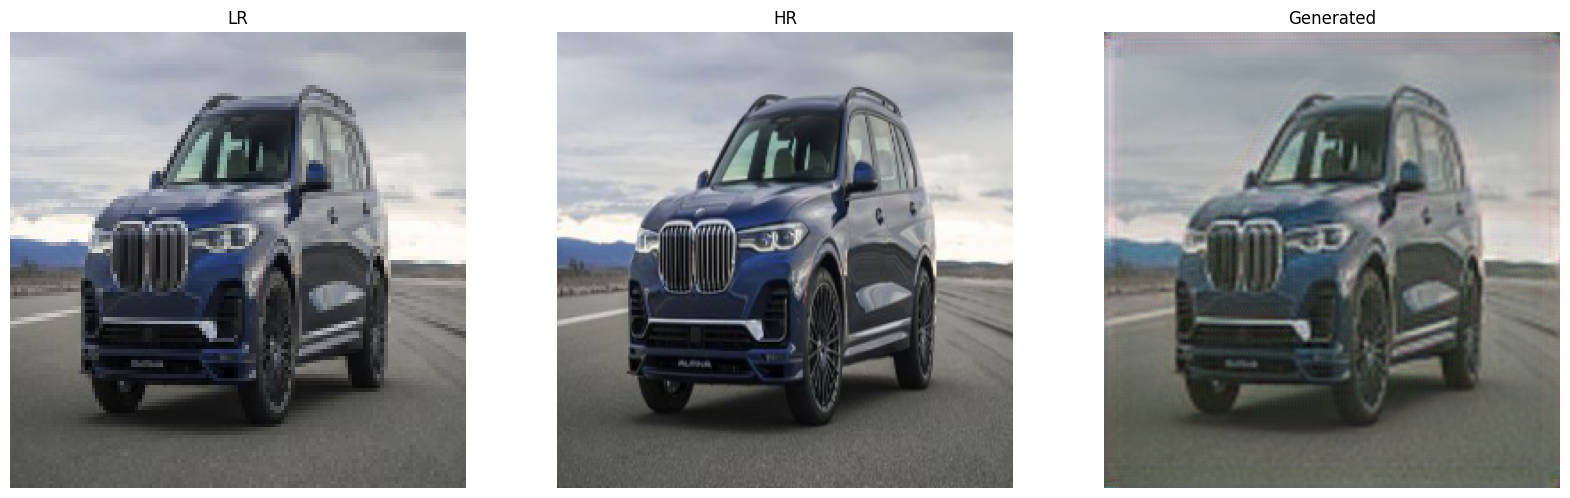

In [9]:
# Evaluate the model

# No grad
with torch.no_grad():

    generated_image = trainer.generator(test_lr.unsqueeze(0).to(device))
    print(generated_image.shape)

ImageUtils.display_images([test_lr, test_hr, generated_image[0].cpu()], ["LR", "HR", "Generated"])


In [10]:
# Psnr and SSIM
# Create function to calculate PSNR
def PSNR(original, compressed):
    mse = torch.mean((original - compressed) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * torch.log10(max_pixel / torch.sqrt(mse))
    return psnr

blilnear = torch.nn.functional.interpolate(test_lr.unsqueeze(0), scale_factor=2, mode="bilinear", align_corners=False).to(test_hr.device)
generated_image = generated_image.cpu()

psnr_val = PSNR(test_hr, generated_image)
psnr_val_bilinear = PSNR(test_hr, blilnear)

print(f"PSNR SRGAN: {psnr_val}")
print(f"PSNR Bilinear: {psnr_val_bilinear}")

PSNR SRGAN: 74.02497100830078
PSNR Bilinear: 75.38514709472656
